In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df_all = pd.read_csv(
    "pv_cleaned_all.csv",
    parse_dates=["timestamp"]
)

df_all




,source_file,pv_power_w,timestamp,interval_minutes,is_generation,hour,day,month,weekday,pv_energy_kwh
0,26_measurements.csv,0.0,2015-02-28 23:00:00+00:00,NaN,False,23,2015-02-28,2,5,NaN
1,26_measurements.csv,0.0,2015-03-01 00:00:00+00:00,60.0,False,0,2015-03-01,3,6,0.0
2,26_measurements.csv,0.0,2015-03-01 01:00:00+00:00,60.0,False,1,2015-03-01,3,6,0.0
3,26_measurements.csv,0.0,2015-03-01 02:00:00+00:00,60.0,False,2,2015-03-01,3,6,0.0
4,26_measurements.csv,0.0,2015-03-01 03:00:00+00:00,60.0,False,3,2015-03-01,3,6,0.0
...,...,...,...,...,...,...,...,...,...,...
284035,28_measurements.csv,0.0,2025-12-17 18:00:00+00:00,60.0,False,18,2025-12-17,12,2,0.0
284036,28_measurements.csv,0.0,2025-12-17 19:00:00+00:00,60.0,False,19,2025-12-17,12,2,0.0
284037,28_measurements.csv,0.0,2025-12-17 20:00:00+00:00,60.0,False,20,2025-12-17,12,2,0.0
284038,28_measurements.csv,0.0,2025-12-17 21:00:00+00:00,60.0,False,21,2025-12-17,12,2,0.0


In [2]:
import os
os.getcwd()

'c:\\Users\\nicob\\Inf2-Hausarbeit-SolarAnalyse'

In [3]:
os.listdir()


['.git',
 'Daten_Bereinigung.py',
 'Hausarbeit.ipynb',
 'Metadaten',
 'README.md',
 'Rohdaten']

# Wie verändert sich die PV-Leistung im Tagesverlauf?

### Ziel der Analyse:
Ziel der Analyse ist es, den typischen Tagesverlauf der Photovoltaikanlage zu untersuchen und zu analysieren, wie sich dieser Tagesverlauf zwischen den einzelnen Jahren unterscheidet. Dabei wird die erzeugte Leistung in Abhängigkeit von der Tageszeit betrachtet, um zu prüfen, ob sich ein charakteristisches Muster zeigt und ob sich dieses im Zeitverlauf verändert.

### Vorgang:
Für die Analyse werden der Zeitstempel der Messungen, die PV-Leistung in Watt sowie die Stunde des Tages verwendet. Zunächst wird aus dem Zeitstempel das jeweilige Jahr extrahiert. Anschließend werden die Daten nach Jahr und Stunde des Tages gruppiert. Für jede Kombination aus Jahr und Stunde wird der durchschnittliche Leistungswert berechnet. Die resultierenden Stundendurchschnittswerte werden in einem Liniendiagramm visualisiert, um die Tagesverläufe der einzelnen Jahre vergleichend darzustellen.

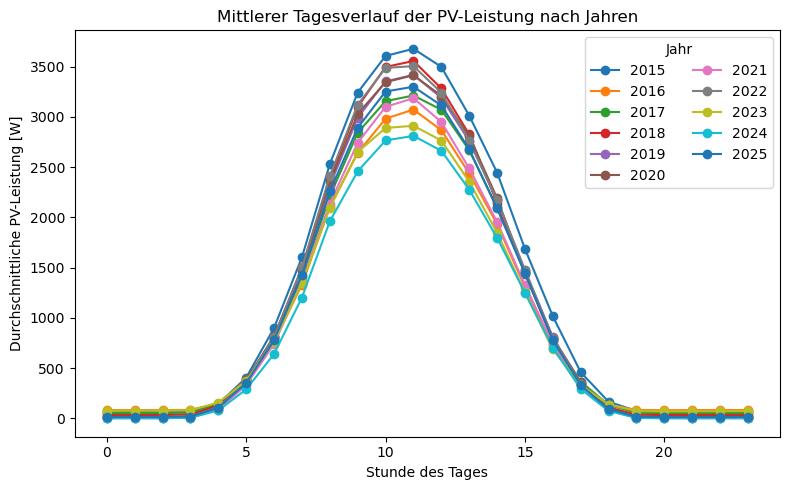

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------
# Zeitstempel korrekt behandeln
# -------------------

# Fall 1: timestamp ist Spalte
if "timestamp" in df_all.columns:
    df_all["timestamp"] = pd.to_datetime(df_all["timestamp"])
    df_all["year"] = df_all["timestamp"].dt.year

# Fall 2: timestamp ist Index
elif isinstance(df_all.index, pd.DatetimeIndex):
    df_all["year"] = df_all.index.year

else:
    raise ValueError("Kein Zeitstempel gefunden (weder Spalte noch Index).")

# -------------------
# Stundenmittel pro Jahr
# -------------------

pv_hourly_yearly = (
    df_all
    .groupby(["year", "hour"])["pv_power_w"]
    .mean()
    .reset_index()
)

# -------------------
# Plot
# -------------------

plt.figure(figsize=(8, 5))

for year in sorted(pv_hourly_yearly["year"].unique()):
    data_year = pv_hourly_yearly[pv_hourly_yearly["year"] == year]
    plt.plot(
        data_year["hour"],
        data_year["pv_power_w"],
        marker="o",
        label=str(year)
    )

plt.xlabel("Stunde des Tages")
plt.ylabel("Durchschnittliche PV-Leistung [W]")
plt.title("Mittlerer Tagesverlauf der PV-Leistung nach Jahren")
plt.legend(title="Jahr", ncol=2)
plt.tight_layout()
plt.show()


# Gibt es Saisonale Unterschiede in der PV- Erzeugung?


### Ziel der Analyse:

Ziel dieser Analyse ist es, saisonale Unterschiede in der Photovoltaik-Energieerzeugung zu untersuchen. Dabei soll analysiert werden, in welchem Ausmaß sich die Erträge zwischen den Jahreszeiten unterscheiden und ob die Sommermonate, wie aufgrund der höheren Sonneneinstrahlung zu erwarten, deutlich höhere Energieerträge liefern

### Vorgang:

Die Monate werden zu ihren jeweiligen Jahreszeiten zugeordnet. Anschließend wird für jede Jahreszeit ihren durchschnittlichen Wert der Photovoltaik-Anlage bestimmt. Auf Basis dieser Mittelwerte werden dann die saisonalen Unterschiede miteinander verglichen

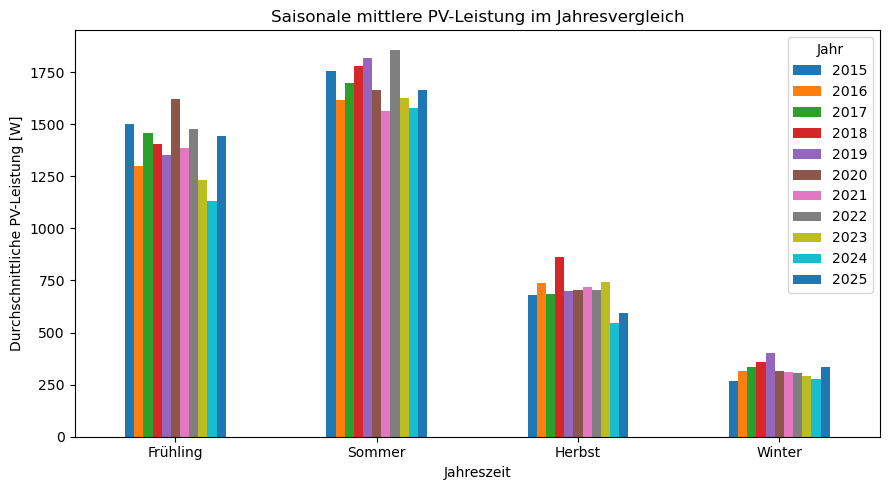

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Zeitstempel robust behandeln
# --------------------------------------------------

# Fall A: timestamp ist Spalte
if "timestamp" in df_all.columns:
    df_all["timestamp"] = pd.to_datetime(df_all["timestamp"])
    df_all["year"] = df_all["timestamp"].dt.year
    df_all["month"] = df_all["timestamp"].dt.month

# Fall B: timestamp ist Index
elif isinstance(df_all.index, pd.DatetimeIndex):
    df_all["year"] = df_all.index.year
    df_all["month"] = df_all.index.month

# Fall C: kein Zeitstempel vorhanden → abbrechen
else:
    raise ValueError("Kein Zeitstempel gefunden (weder Spalte noch DatetimeIndex).")

# --------------------------------------------------
# 2. Jahreszeiten zuweisen
# --------------------------------------------------

season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Frühling", 4: "Frühling", 5: "Frühling",
    6: "Sommer", 7: "Sommer", 8: "Sommer",
    9: "Herbst", 10: "Herbst", 11: "Herbst"
}

df_all["season"] = df_all["month"].map(season_map)

# --------------------------------------------------
# 3. Saisonale Mittelwerte pro Jahr berechnen
# --------------------------------------------------

season_year_means = (
    df_all
    .groupby(["year", "season"])["pv_power_w"]
    .mean()
    .reset_index()
)

# --------------------------------------------------
# 4. In Wide-Format bringen
# --------------------------------------------------

season_year_df = season_year_means.pivot(
    index="season",
    columns="year",
    values="pv_power_w"
)

# Reihenfolge der Jahreszeiten festlegen
season_order = ["Frühling", "Sommer", "Herbst", "Winter"]
season_year_df = season_year_df.reindex(season_order)

# --------------------------------------------------
# 5. Plot
# --------------------------------------------------

plt.figure(figsize=(9, 5))
season_year_df.plot(kind="bar", ax=plt.gca())

plt.title("Saisonale mittlere PV-Leistung im Jahresvergleich")
plt.ylabel("Durchschnittliche PV-Leistung [W]")
plt.xlabel("Jahreszeit")
plt.xticks(rotation=0)
plt.legend(title="Jahr")

plt.tight_layout()
plt.show()


# Streuung der Pv - Anlage im Tagesverlauf?

### Ziel der Analyse:

Ziel der Analyse ist es, die Variabilität der Photovoltaik-Leistung im Tagesverlauf zu untersuchen. Dabei soll analysiert werden, zu welchen Tageszeiten die PV-Leistung stabil verläuft und in welchen Zeiträumen eine erhöhte Streuung der Erzeugung auftritt.

### Vorgang:

Die PV-Leistungsdaten wurden nach der Stunde des Tages gruppiert. Für jede Stunde wurden Boxplots erstellt, die die Verteilung der Leistungswerte über den gesamten Beobachtungszeitraum abbilden. Dadurch lassen sich Unterschiede in der Stabilität und Streuung der PV-Leistung im Tagesverlauf vergleichen.

<Figure size 1000x500 with 0 Axes>

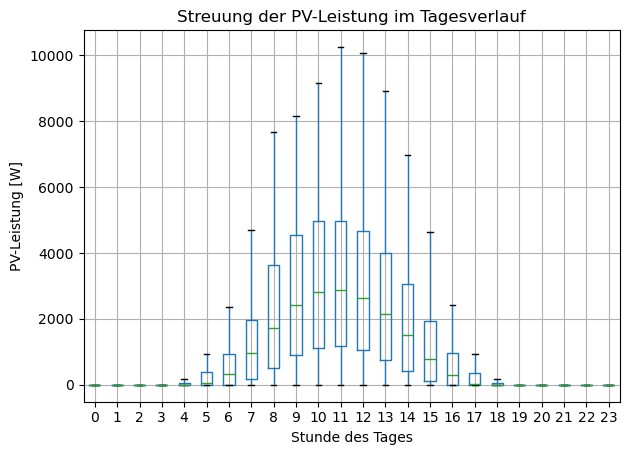

In [ ]:


plt.figure(figsize=(10, 5))

df_all.boxplot(
    column="pv_power_w",
    by="hour",
    showfliers=False
)

plt.xlabel("Stunde des Tages")
plt.ylabel("PV-Leistung [W]")
plt.title("Streuung der PV-Leistung im Tagesverlauf")
plt.suptitle("")

plt.tight_layout()
plt.show()




## Wie viele Stunden am Tag erzeugen die Solaranlagen überhaupt Strom?



#### Ziel der Analyse 

... ist es, herauszufinden, wie viele Stunden pro Tag eine Solaranlage im Durchschnitt tatsächlich Strom erzeugt. Dadurch soll ein Überblick darüber gewonnen werden, wie lange die Anlagen täglich aktiv zur Stromproduktion beitragen.
Zusätzlich ermöglicht diese Auswertung einen Vergleich zwischen verschiedenen Solaranlagen sowie zwischen unterschiedlichen Monaten, sodass saisonale Schwankungen im Jahresverlauf sichtbar werden.

#### Vorgang: 

Es werden die täglichen Stunden an denen die Anlagen aktiv sind zusammengezählt und dann der monatliche Durchschnitt berechnet. 
Zur besseren Übersicht wurden auf der x-Achse nur alle drei Monate dargestellt.

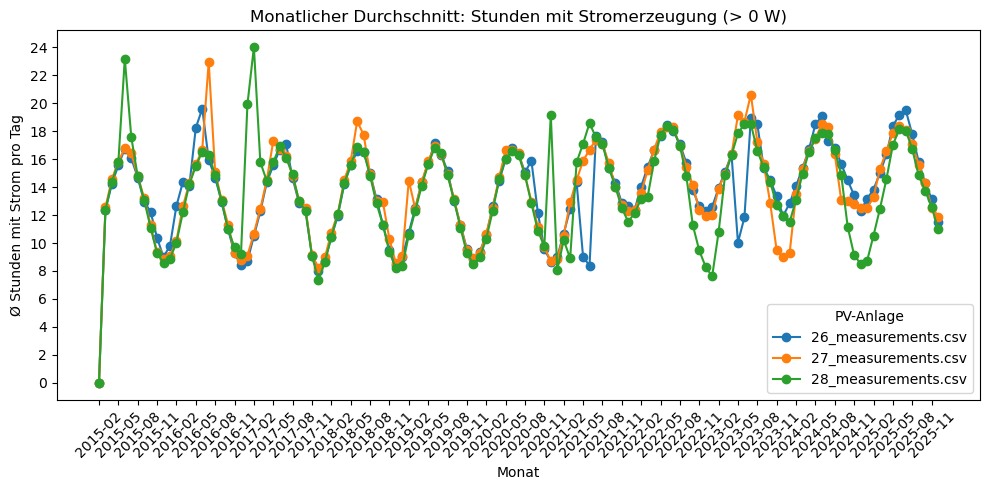

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sicherstellen, dass timestamp datetime ist
df_all["timestamp"] = pd.to_datetime(df_all["timestamp"], utc=True)

# Datum für Gruppierung
df_all["date"] = df_all["timestamp"].dt.date

# Stromerzeugung ja/nein
df_all["producing"] = df_all["pv_power_w"] > 0

# Stunden mit Strom pro Tag UND Anlage
hours_per_day = (
    df_all
    .groupby(["source_file", "date"])["producing"]
    .sum()
    .reset_index()
)

# Monat extrahieren
hours_per_day["date"] = pd.to_datetime(hours_per_day["date"])
hours_per_day["month"] = hours_per_day["date"].dt.to_period("M")

# Monatsdurchschnitt pro Anlage
monthly_avg = (
    hours_per_day
    .groupby(["month", "source_file"])["producing"]
    .mean()
    .reset_index()
)

# In Wide-Format für Plot
monthly_df = monthly_avg.pivot(
    index="month",
    columns="source_file",
    values="producing"
)

# -------------------
# Diagramm
# -------------------

plt.figure(figsize=(10, 5))

x_values = monthly_df.index.astype(str)

for anlage in monthly_df.columns:
    plt.plot(
        x_values,
        monthly_df[anlage],
        marker="o",
        label=anlage   
    )

# X-Achse: nur alle 3 Monate beschriften
tick_positions = range(0, len(x_values), 3)
tick_labels = x_values[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)

# Y-Achse: Stunden in 2er-Schritten
y_max = int(monthly_df.max().max()) + 1
plt.yticks(range(0, y_max + 1, 2))

plt.xlabel("Monat")
plt.ylabel("Ø Stunden mit Strom pro Tag")
plt.title("Monatlicher Durchschnitt: Stunden mit Stromerzeugung (> 0 W)")
plt.legend(title="PV-Anlage")
plt.tight_layout()
plt.show()


#### Fazit: 

Man kann hier eine sehr schöne Kurve erkennen, die eine Periodendauer von einem Jahr hat. Diese Kurve ist darauf zurückzuführen, dass es im Sommer mehr tägliche Sonnenstunden hat als im Winter. Die Analyse zeigt somit anschaulich den starken Einfluss der Jahreszeiten auf die Leistungsfähigkeit von Solaranlagen.

## Wie verändert sich der Zeitpunkt der maximalen Leistung im Jahresverlauf?

#### Ziel der Analyse

... ist es zu untersuchen, zu welchem Zeitpunkt am Tag die Solaranlagen ihre höchste Leistung erzeugen. Dabei wird betrachtet, ob sich der Zeitpunkt der maximalen Energieerzeugung im Verlauf des Jahres verändert und ob Unterschiede zwischen den einzelnen Anlagen bestehen.


#### Vorgang: 

Für jede Solaranlage wurde pro Tag der Zeitpunkt der maximalen Leistung bestimmt.
Diese Zeitpunkte wurden anschließend zu monatlichen Durchschnittswerten zusammengefasst.
Zur besseren Übersicht wurden auf der x-Achse nur alle drei Monate dargestellt.


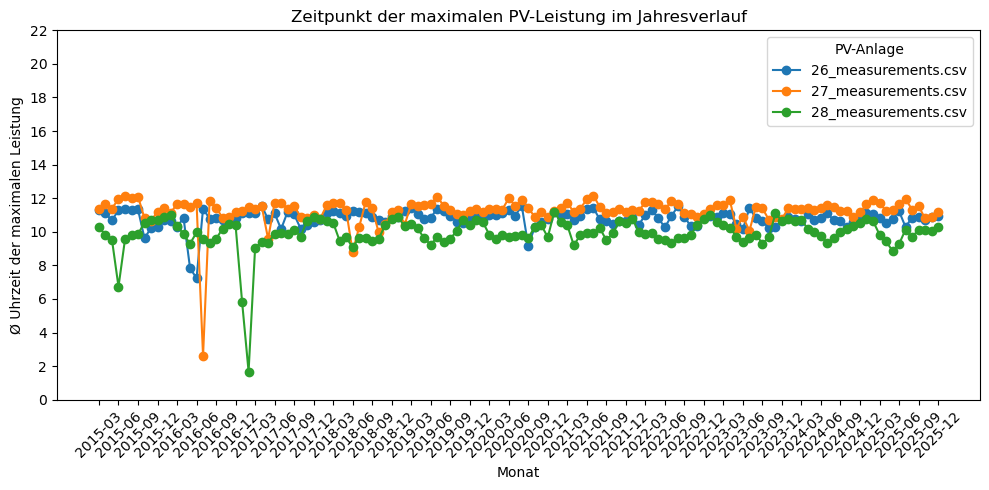

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Zeitstempel sicherstellen
df_all["timestamp"] = pd.to_datetime(df_all["timestamp"])

# Datum & Stunde
df_all["date"] = df_all["timestamp"].dt.date
df_all["hour"] = df_all["timestamp"].dt.hour

# Nur positive Leistungen
df_pos = df_all[df_all["pv_power_w"] > 0].copy()

# Zeitpunkt der maximalen Leistung pro Tag UND Anlage
idx = (
    df_pos
    .groupby(["source_file", "date"])["pv_power_w"]
    .idxmax()
    .dropna()
)

daily_max = df_pos.loc[idx].copy()

# Monat extrahieren
daily_max["date"] = pd.to_datetime(daily_max["date"])
daily_max["month"] = daily_max["date"].dt.to_period("M")

# Monatlicher Durchschnitt der Uhrzeit pro Anlage
monthly_mean = (
    daily_max
    .groupby(["month", "source_file"])["hour"]
    .mean()
    .reset_index()
)

# In Wide-Format für Plot
monthly_df = monthly_mean.pivot(
    index="month",
    columns="source_file",
    values="hour"
)

# -------------------
# Diagramm
# -------------------

plt.figure(figsize=(10, 5))

x_values = monthly_df.index.astype(str)

for anlage in monthly_df.columns:
    plt.plot(
        x_values,
        monthly_df[anlage],
        marker="o",
        label=anlage
    )

# X-Achse: nur alle 3 Monate
tick_positions = range(0, len(x_values), 3)
tick_labels = x_values[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)

# Y-Achse: 2-Stunden-Schritte
plt.yticks(range(0, 24, 2))

plt.xlabel("Monat")
plt.ylabel("Ø Uhrzeit der maximalen Leistung")
plt.title("Zeitpunkt der maximalen PV-Leistung im Jahresverlauf")
plt.legend(title="PV-Anlage")
plt.tight_layout()
plt.show()


#### Fazit: 
Anlage 28 erreicht ihr Leistungsmaximum im Vergleich zu den anderen Anlagen früher am Tag. Dies lässt sich durch die Ausrichtung der Anlage nach Südosten erklären.
Die Sonne geht im Winter eher südöstlich und im Sommer nordöstlich auf. Entsprechend wird in den Wintermonaten der Zeitpunkt der maximalen Leistung früher am Tag erreicht als in den Sommermonaten. Dieser saisonale Effekt ist in den ausgewerteten Daten deutlich erkennbar.(Grüne Kurve)

(Ausreißer nicht beachtet)

### Wie zuverlässig sind die Solaranlagen im Bezug auf eine vorhersehbare Stromproduktion?

#### Ziel der Analyse 

... ist es, herauszufinden, wie gut die produzierte Energie vorhersagbar ist, um eine bessere Planung zu ermöglichen.
Dabei wird untersucht, inwieweit sich regelmäßige Muster im vergangen Verlauf der Stromerzeugung erkennen lassen.

#### Vorgang: 

Es werden die wöchentlichen Energieerträge aufsummiert, indem die gemessenen Leistungswerte einer Woche zusammengefasst werden. Anschließend werden diese wöchentlichen Gesamtwerte über den gesamten Betrachtungszeitraum dargestellt, sodass man sie vergleichen kann. 

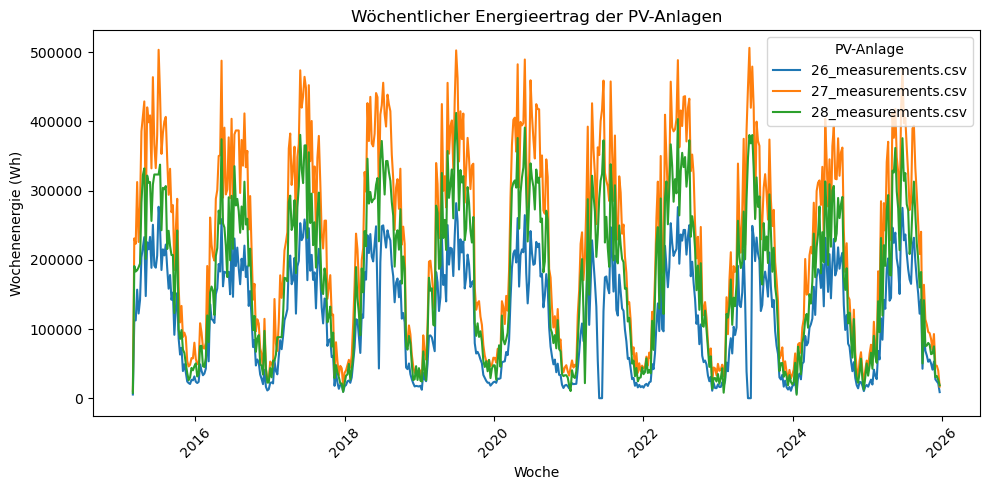

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Zeitstempel vorbereiten
df_all["timestamp"] = pd.to_datetime(df_all["timestamp"])
df_all = df_all.set_index("timestamp")

# Dictionary für Ergebnisse
weekly_energy_results = {}

# Verarbeitung pro Anlage
for anlage, df_anlage in df_all.groupby("source_file"):

    # Wöchentlicher Energieertrag (Wh)
    # Annahme: 1 Zeile = 1 Stunde → Summe der Leistung ≈ Energie
    weekly_energy = df_anlage["pv_power_w"].resample("W").sum()

    weekly_energy_results[anlage] = weekly_energy


# -------------------
# Diagramm
# -------------------

plt.figure(figsize=(10, 5))

for anlage, energy in weekly_energy_results.items():
    plt.plot(
        energy.index,
        energy.values,
        label=anlage
    )

plt.xlabel("Woche")
plt.ylabel("Wochenenergie (Wh)")
plt.title("Wöchentlicher Energieertrag der PV-Anlagen")
plt.legend(title="PV-Anlage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Fazit:

Die Analyse zeigt einen deutlichen saisonalen Verlauf der wöchentlichen Energieerträge. Während im Sommer hohe Erträge erzielt werden, sinkt die Stromproduktion im Winter deutlich ab. Langfristig ist die Stromproduktion jedoch regelmäßig und gut vorhersehbar, wobei Unterschiede zwischen den einzelnen Anlagen erkennbar sind, welche auf die unterschiedlichen Leistungen zurückzuführen sind. 

Anlage 27 (11,75 kWp), Anlage 28 (9,24kWp), Anlage 26 (7,44 kWp) (kwp=Kilowatt-peak)